<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-AI/blob/master/neural_network_examples/AI_Linear_Regression_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Import the iris dataset's first four columns
# Metadata: https://github.com/badriadhikari/2019-Spring-AI/blob/master/supplementary/iris.names
#  Column 2. sepal width in cm (load as col 0)
#  Column 3. petal length in cm (load as col 1)
#  Column 4. petal width in cm (load as col 2)
dataset = np.genfromtxt("https://raw.githubusercontent.com/badriadhikari/2019-Spring-AI/master/supplementary/iris.data", delimiter=",", usecols=(1, 2, 3))

print('')
print(dataset.shape)
print('')
print(dataset[0:5])

Using TensorFlow backend.



(150, 3)

[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]]


In [2]:
# Q1. Why is shuffling important before splitting?
np.random.shuffle(dataset)
print('')
print(dataset[0:5])
# Say, we would like to predict petal width (col4) using 
#   sepal width (col2) and petal length (col3)
train = dataset[:100]
valid = dataset[100:]
print('')
print(train.shape)
print('')
print(valid.shape)


[[3.1 1.5 0.1]
 [3.  4.2 1.5]
 [3.  5.5 2.1]
 [2.8 5.6 2.1]
 [3.3 1.4 0.2]]

(100, 3)

(50, 3)


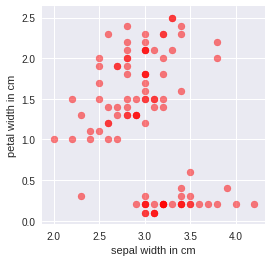

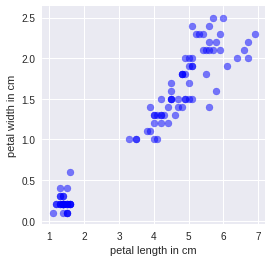

In [12]:
#Q2. Which of the two input features seems more useful
#    for predicting petal width?
plt.figure(figsize=(4,4))
plt.scatter(train[:, 0], train[:, 2], color = 'r', alpha = 0.5)
plt.xlabel('sepal width in cm')
plt.ylabel('petal width in cm')
plt.show()
plt.figure(figsize=(4,4))
plt.scatter(train[:, 1], train[:, 2], color = 'b', alpha = 0.5)
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.show()

In [4]:
train_input = train[:, 0:2] # col 2 & 3
train_output = train[:, 2] # col 4
valid_input = valid[:, 0:2]
valid_output = valid[:, 2]

print('')
print(train_input[0:5])
print('')
print(train_output[0:5])


[[3.1 1.5]
 [3.  4.2]
 [3.  5.5]
 [2.8 5.6]
 [3.3 1.4]]

[0.1 1.5 2.1 2.1 0.2]


In [5]:
#Q3. Why is the number of parameters = 3? 
model = Sequential()
model.add(Dense(1, input_dim = len(train_input[0]), activation='linear'))
print(model.summary())

# Changing 'mae' to 'mse' should improve the smoothness of 
#  the learning curve and possibly the overall errors
model.compile(loss='mae', optimizer='sgd', metrics=['mae'])

# Verbose = 0 shows no updates, can be changed to 1 or 2
history = model.fit(train_input, train_output, epochs=50, 
                    verbose = 0, batch_size=10, 
                    validation_data = (valid_input, valid_output))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


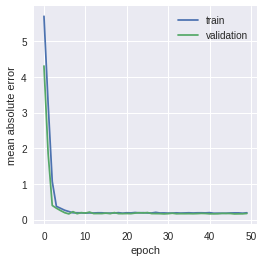

In [15]:
#Q4. Why eventually validation MAE is not 
#    always less than train MAE?
plt.figure(figsize=(4,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [7]:
#Q5. Are these predictions reasonable?
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(valid_output[0:5])
prediction = model.predict(valid_input)
print ('Prediction:')
print(prediction[0:5].T)

True Validation Data:
[0.3 0.1 1.5 2.3 1.1]
Prediction:
[[0.33 0.22 1.65 2.03 1.  ]]


In [8]:
#Q6. What weight corresponds to which input feature?
#    Which input feature is important? Why?     
print('Model weights (w0, w1, and bias):')
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(w1)
print(b0)

Model weights (w0, w1, and bias):
[-0.11]
[0.41]
[0.04]


In [9]:
#Q7. Why do we use model.predict(), if we can compute
#    the predictions from weights that the model learns?
print('Validation Data 0:')
print(valid_input[0], valid_output[0])
print('Prediction:')
print(valid_input[0, 0] * (w0) + valid_input[0, 1] * (w1) + (b0))
print('Validation Data 1:')
print(valid_input[1], valid_output[1])
print('Prediction:')
print(valid_input[1, 0] * (w0) + valid_input[1, 1] * (w1) + (b0))

Validation Data 0:
[3.8 1.7] 0.3
Prediction:
[0.33]
Validation Data 1:
[4.1 1.5] 0.1
Prediction:
[0.22]
